## CEIA - Visión por Computadora I - TP3

#### Integrantes
- Omar Victor Manuel Lopez Cabrera (a1609)
- Matías Alejandro Marando (a1615)

#### Consigna 

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
`Material_TPs/TP3/images` a partir del template `Material_TPs/TP3/template`.
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del item 2
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

--------------

#### Resolución 

In [16]:
# Importamos librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
from imutils.object_detection import non_max_suppression

In [17]:
template = cv.imread('template/pattern.png',0)

img_test1= cv.imread('images/logo_1.png')
img_test1_rgb= cv.cvtColor(img_test1, cv.COLOR_BGR2RGB)
img_test1_gray= cv.cvtColor(img_test1, cv.COLOR_BGR2GRAY)

img_test2= cv.imread('images/coca_logo_1.png')
img_test2_rgb= cv.cvtColor(img_test2, cv.COLOR_BGR2RGB)
img_test2_gray= cv.cvtColor(img_test2, cv.COLOR_BGR2GRAY)

img_test3= cv.imread('images/coca_logo_2.png')
img_test3_rgb= cv.cvtColor(img_test3, cv.COLOR_BGR2RGB)
img_test3_gray= cv.cvtColor(img_test3,cv.COLOR_BGR2GRAY)

img_test4= cv.imread('images/coca_retro_1.png')
img_test4_rgb= cv.cvtColor(img_test4, cv.COLOR_BGR2RGB)
img_test4_gray= cv.cvtColor(img_test4, cv.COLOR_BGR2GRAY)

img_test5= cv.imread('images/coca_retro_2.png')
img_test5_rgb= cv.cvtColor(img_test5, cv.COLOR_BGR2RGB)
img_test5_gray= cv.cvtColor(img_test5, cv.COLOR_BGR2GRAY)

img_test6= cv.imread('images/COCA-COLA-LOGO.jpg')
img_test6_rgb= cv.cvtColor(img_test6, cv.COLOR_BGR2RGB)
img_test6_gray= cv.cvtColor(img_test6, cv.COLOR_BGR2GRAY)


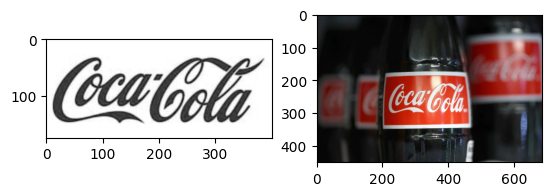

In [18]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_test1_rgb)

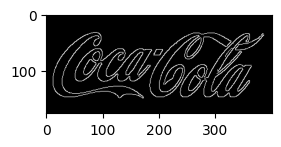

In [19]:
#Obtenemos los bordes de la imagen utilizando el metodo de Canny
template = cv.Canny(template, 50, 200)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(template, cmap='gray')

In [20]:
#obtengo las dimensiones del template, para saber hasta cuanto puedo aumentar o disminuir la imagen en donde buscar el template
(tH, tW) = template.shape[:2]
print(tH, tW)


175 400


#### 1. Detección única del logo 

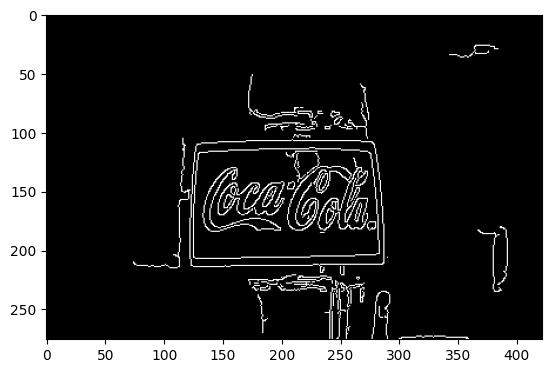

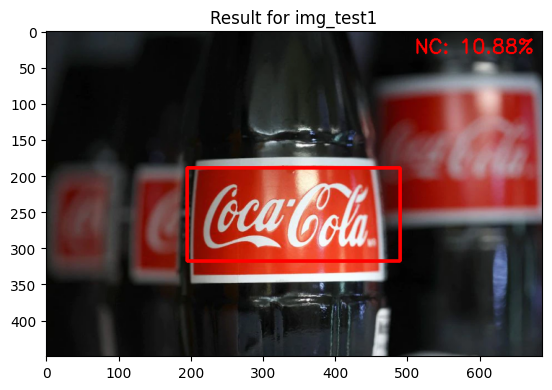

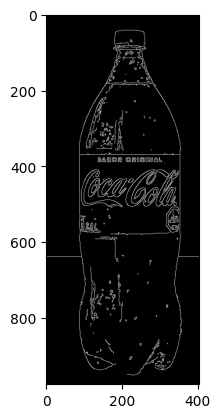

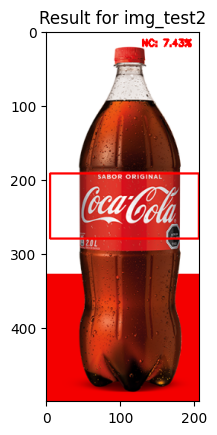

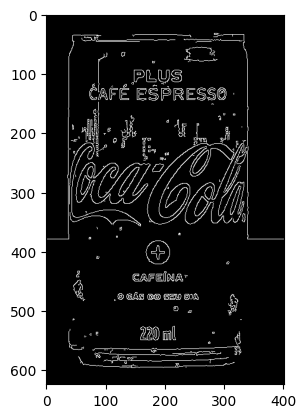

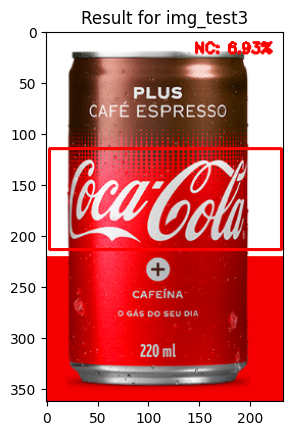

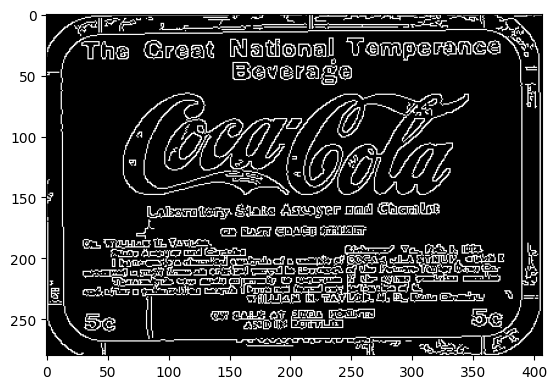

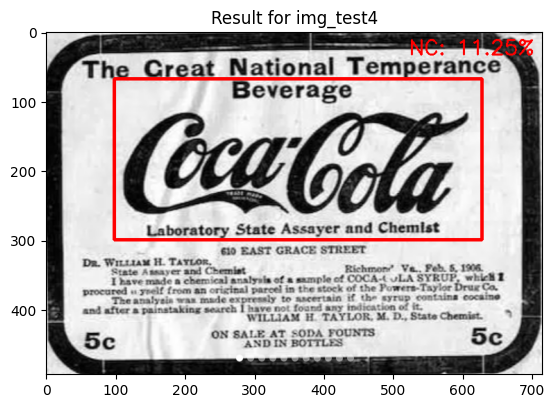

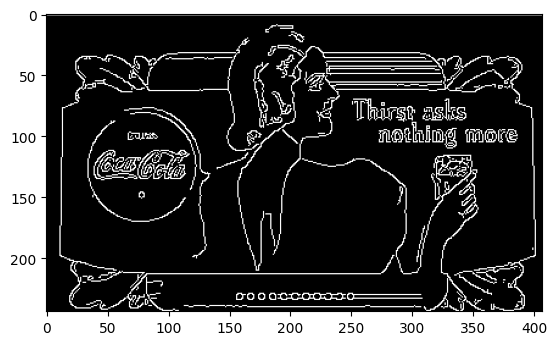

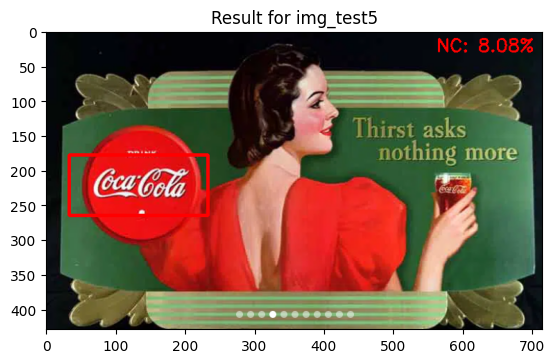

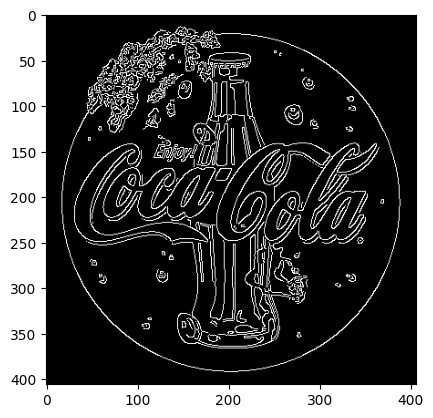

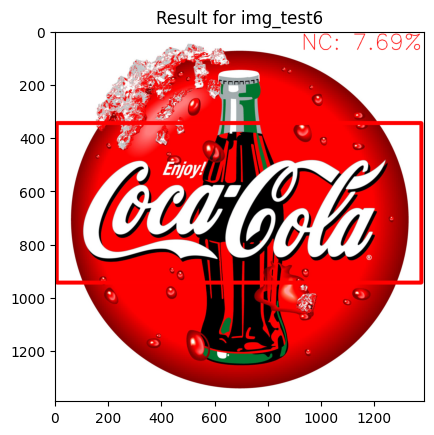

In [21]:
# Función para buscar el template en una imagen y ajustar el tamaño del rectángulo y el texto NC
def find_template_in_image(img_gray, img_rgb, template, tH, tW):
    best_match_val = -np.inf
    best_match_loc = None
    best_r = None
    best_norm_val = 0

    # Loop sobre diferentes escalas de la imagen
    for scale in np.linspace(0.2, 2.0, 40)[::-1]:
        # Redimensionar la imagen de acuerdo al scale
        resized = imutils.resize(img_gray, width=int(img_gray.shape[1] * scale))
        r = img_gray.shape[1] / float(resized.shape[1])

        # Si la imagen redimensionada es más pequeña que el template, romper el loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # Detectar bordes en la imagen redimensionada
        edged = cv.Canny(resized, 50, 200)


        # Aplicar el método de template matching con cv.TM_CCOEFF_NORMED
        result = cv.matchTemplate(edged, template, cv.TM_CCOEFF_NORMED)
        (_, maxVal, _, maxLoc) = cv.minMaxLoc(result)

        # Guardar la mejor coincidencia y el valor normalizado
        if maxVal > best_match_val:
            best_match_val = maxVal
            best_match_loc = maxLoc
            best_r = r
            best_norm_val = maxVal  # Nivel de confianza normalizado
     #imprimo los bordes de la imagen
    # Verificar si se encontró una coincidencia válida
    if best_match_loc is not None and best_r is not None:
        # Ajustar el tamaño del rectángulo según el tamaño de la imagen original
        (startX, startY) = (int(best_match_loc[0] * best_r), int(best_match_loc[1] * best_r))
        (endX, endY) = (int((best_match_loc[0] + tW) * best_r), int((best_match_loc[1] + tH) * best_r))

        # Dibujar el rectángulo con tamaño exacto en la imagen original
        rect_thickness = max(2, int(min(img_rgb.shape[0], img_rgb.shape[1]) / 100))
        cv.rectangle(img_rgb, (startX, startY), (endX, endY), (255, 0, 0), rect_thickness)

        # Calcular el nivel de confianza en porcentaje (de 0 a 100%)
        confidence = best_norm_val * 100

        # Ajustar el tamaño del texto de "NC" a una décima parte de las dimensiones de la imagen
        font_scale = min(img_rgb.shape[0], img_rgb.shape[1]) / 500  # Ajuste proporcional al tamaño de la imagen
        text = f"NC: {confidence:.2f}%"
        (text_width, text_height), _ = cv.getTextSize(text, cv.FONT_HERSHEY_SIMPLEX, font_scale, 2)

        # Poner el texto en la esquina superior derecha
        cv.putText(img_rgb, text, (img_rgb.shape[1] - text_width - 10, text_height + 10),
                   cv.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), 2)
    else:
        print(f"No se encontró una coincidencia válida en la imagen.")
    plt.figure()
    plt.imshow(edged, cmap='gray')
    return img_rgb

# Cargar imágenes de prueba y convertirlas a gris
images = [
    ('images/logo_1.png', 'img_test1'),
    ('images/coca_logo_1.png', 'img_test2'),
    ('images/coca_logo_2.png', 'img_test3'),
    ('images/coca_retro_1.png', 'img_test4'),
    ('images/coca_retro_2.png', 'img_test5'),
    ('images/COCA-COLA-LOGO.jpg', 'img_test6')
]

for image_path, image_name in images:
    img_test = cv.imread(image_path)
    img_test_rgb = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)
    img_test_gray = cv.cvtColor(img_test, cv.COLOR_BGR2GRAY)

    # Buscar el template en la imagen y mostrar el resultado
    result_img = find_template_in_image(img_test_gray, img_test_rgb, template, tH, tW)

    plt.figure()
    plt.title(f'Result for {image_name}')
    plt.imshow(result_img)
    plt.show()

----
#### 2. Detección de múltiples logos

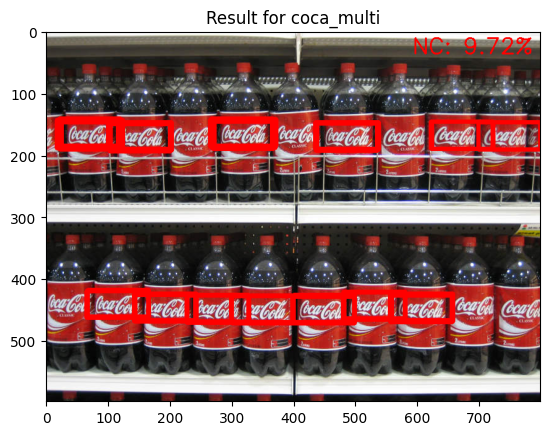

In [22]:
# Función para buscar multiples templates en una imagen
def find_multiple_template_in_image(img_gray, img_rgb, template, tH, tW, dbg_print=False):
    best_match_val = -np.inf
    best_match_loc = None
    best_r = None
    best_norm_val = 0

    # Loop sobre diferentes escalas de la imagen
    for scale in np.linspace(0.2, 5.0, 50)[::-1]:
        # Redimensionar la imagen de acuerdo al scale
        resized = imutils.resize(img_gray, width=int(img_gray.shape[1] * scale))
        r = img_gray.shape[1] / float(resized.shape[1])

        # Si la imagen redimensionada es más pequeña que el template, romper el loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break

        # Detectar bordes en la imagen redimensionada
        edged = cv.Canny(resized, 50, 200)

        # Aplicar el método de template matching con cv.TM_CCOEFF_NORMED
        result = cv.matchTemplate(edged, template, cv.TM_CCOEFF_NORMED)
        (_, maxVal, _, maxLoc) = cv.minMaxLoc(result)

        # Guardar la mejor coincidencia y el valor normalizado
        if maxVal > best_match_val:
            best_match_val = maxVal
            best_match_loc = maxLoc
            best_r = r
            best_scale = scale
            best_norm_val = maxVal  # Nivel de confianza normalizado

    if dbg_print:
        print(f'best_scale = {best_scale:.2f}, best_match_val = {best_match_val:.2f}, best_r = {best_r:.3f}')

    # Si se encontró una mejor coincidencia, buscamos otras en esa escala
    if best_match_loc is not None:
        matches = []
        resized = imutils.resize(img_gray, width=int(img_gray.shape[1] * best_scale))
        edged = cv.Canny(resized, 50, 200)
        result = cv.matchTemplate(edged, template, cv.TM_CCOEFF_NORMED)

        # Umbral dinamico basado en el mejor valor encontrado
        threshold = best_match_val * 0.7
        loc = np.where(result >= threshold)

        for i in range(len(loc[0])):
            pt = (loc[1][i], loc[0][i])
            (startX, startY) = (int(pt[0] * best_r), int(pt[1] * best_r))
            (endX, endY) = (int((pt[0] + tW) * best_r), int((pt[1] + tH) * best_r))

            rect_thickness = max(2, int(min(img_rgb.shape[0], img_rgb.shape[1]) / 100))
            cv.rectangle(img_rgb, (startX, startY), (endX, endY), (255, 0, 0), rect_thickness)

        # Imprimimos el nivel de confianza solo para el mayor valor encontrado
        confidence = best_norm_val * 100

        # Ajustar el tamaño del texto de "NC" a una décima parte de las dimensiones de la imagen
        font_scale = min(img_rgb.shape[0], img_rgb.shape[1]) / 500  # Ajuste proporcional al tamaño de la imagen
        text = f"NC: {confidence:.2f}%"
        (text_width, text_height), _ = cv.getTextSize(text, cv.FONT_HERSHEY_SIMPLEX, font_scale, 2)

        # Poner el texto en la esquina superior derecha
        cv.putText(img_rgb, text, (img_rgb.shape[1] - text_width - 10, text_height + 10),
                   cv.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), 2)
    else:
        print(f"No se encontró una coincidencia válida en la imagen.")

    return img_rgb

# Cargar imágenes de prueba y convertirlas a gris
images = [
    ('images/coca_multi.png', 'coca_multi'),
]

for image_path, image_name in images:
    img_test = cv.imread(image_path)
    img_test_rgb = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)
    img_test_gray = cv.cvtColor(img_test, cv.COLOR_BGR2GRAY)

    # Buscar el template en la imagen y mostrar el resultado
    result_img = find_multiple_template_in_image(img_test_gray, img_test_rgb, template, tH, tW)

    plt.figure()
    plt.title(f'Result for {image_name}')
    plt.imshow(result_img)
    plt.show()

----
#### 3. Algoritmo genérico

In [23]:
# TODO